<h1><center><b>LGMVIP - Data Science</b></center></h1>
<h2><center><b>Task 9 - Handwritten Equation Solver using CNN (Advanced Level)</b></center></h2>
<h3><center><b>Author : Akshay Paunikar</b></center></h3>

In [26]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import keras
import cv2
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json
from keras import backend as K
K.image_data_format()

'channels_last'

In [28]:
# load train data
train=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/LGMVIP-Data Science/Task 9 - Handwritten Equation Solver using CNN/traindata.csv',index_col=False)
labels=train[['784']]

In [29]:
# labels
train[['784']]

,784
0,0
1,0
2,0
3,0
4,0
...,...
157480,13
157481,13
157482,13
157483,13


In [30]:
# drop labels
train.drop(train.columns[[784]],axis=1,inplace=True)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,100,208,178,178,...,0,0,0,0,0,0,0,0,0,0
1,0,0,136,255,180,191,185,77,14,0,...,0,0,0,0,0,0,0,0,0,0
2,0,123,193,178,178,178,178,178,178,178,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,36,77,138,178,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,165,178,178,178,113,0,...,18,0,0,0,0,0,0,0,0,0


In [31]:
# convert into array
labels = np.array(labels)

In [32]:
# Convert into binary class matrix
output = to_categorical(labels,num_classes=14)

In [33]:
print(output[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [34]:
train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,100,208,178,178,...,0,0,0,0,0,0,0,0,0,0
1,0,0,136,255,180,191,185,77,14,0,...,0,0,0,0,0,0,0,0,0,0
2,0,123,193,178,178,178,178,178,178,178,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,36,77,138,178,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,165,178,178,178,113,0,...,18,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157483,255,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# check dimensions of train data
train.shape

(157485, 784)

In [36]:
# convert into numpy array
data = train.to_numpy()

In [37]:
# check dimensions
data.shape[0]

157485

In [38]:
X_train = data.reshape(157485, 28, 28, 1)

In [39]:
X_train.shape

(157485, 28, 28, 1)

<h4><b>Train CNN Model :</b></h4>

In [40]:
# create CNN Model
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(14, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
# Check model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 15)        4335      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 15)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 15)          0         
                                                                 
 flatten_1 (Flatten)         (None, 540)              

In [42]:
# fit training data
model.fit(X_train, output, epochs=10, batch_size=200, shuffle=True, verbose=1)

Epoch 1/10
788/788 [==============================] - 5s 6ms/step - loss: 0.4987 - accuracy: 0.8897
Epoch 2/10
788/788 [==============================] - 4s 6ms/step - loss: 0.0955 - accuracy: 0.9730
Epoch 3/10
788/788 [==============================] - 4s 6ms/step - loss: 0.0599 - accuracy: 0.9831
Epoch 4/10
788/788 [==============================] - 5s 6ms/step - loss: 0.0463 - accuracy: 0.9864
Epoch 5/10
788/788 [==============================] - 5s 6ms/step - loss: 0.0380 - accuracy: 0.9890
Epoch 6/10
788/788 [==============================] - 4s 6ms/step - loss: 0.0312 - accuracy: 0.9911
Epoch 7/10
788/788 [==============================] - 4s 6ms/step - loss: 0.0282 - accuracy: 0.9915
Epoch 8/10
788/788 [==============================] - 4s 6ms/step - loss: 0.0273 - accuracy: 0.9920
Epoch 9/10
788/788 [==============================] - 4s 6ms/step - loss: 0.0221 - accuracy: 0.9933
Epoch 10/10
788/788 [==============================] - 5s 6ms/step - loss: 0.0200 - accuracy: 0.9939

In [43]:
# save our model
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [44]:
# import our saved model
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_final.h5")

In [45]:
# Select our handwritten equation image
img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/LGMVIP-Data Science/Task 9 - Handwritten Equation Solver using CNN/test1.jpg',
                 cv2.IMREAD_GRAYSCALE)

In [46]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

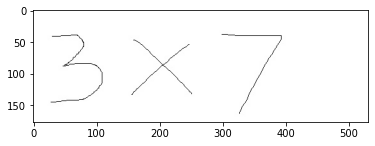

In [47]:
# Show our test image
from PIL import Image
image = Image.open(r"/content/gdrive/MyDrive/Colab Notebooks/LGMVIP-Data Science/Task 9 - Handwritten Equation Solver using CNN/test1.jpg")
plt.imshow(image)
plt.show()

In [48]:
if img is not None:
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        

        im_resize = cv2.resize(im_crop,(28,28))


        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

4
[[28, 39, 82, 107], [50, 86, 3, 3], [156, 47, 96, 87], [299, 38, 95, 126]]
[[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
1
[[28, 39, 82, 107], [156, 47, 96, 87], [299, 38, 95, 126]]


In [49]:
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        s=s+'-'
    if(result[0]==11):
        s=s+'+'
    if(result[0]==12):
        s=s+'*'
    if(result[0]==13):
        s=s+'/'
    if(result[0]==0):
        s=s+'0'
    if(result[0]==1):
        s=s+'1'
    if(result[0]==2):
        s=s+'2'
    if(result[0]==3):
        s=s+'3'
    if(result[0]==4):
        s=s+'4'
    if(result[0]==5):
        s=s+'5'
    if(result[0]==6):
        s=s+'6'
    if(result[0]==7):
        s=s+'7'
    if(result[0]==8):
        s=s+'8'
    if(result[0]==9):
        s=s+'9'
    
print(s)

3*7


In [50]:
eval(s)

21